In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

from time import strftime
import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data, opsd_germany_daily
from prepare import prep_german_data, numeric_hists

In [5]:
df = get_store_data()
df.shape

(913000, 14)

In [6]:
df = get_store_data()
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [7]:
df.dtypes

sale_amount      float64
sale_date         object
sale_id            int64
store_address     object
store_city        object
store_id           int64
store_state       object
store_zipcode      int64
item_brand        object
item_id            int64
item_name         object
item_price       float64
item_upc12         int64
item_upc14         int64
dtype: object

In [8]:
df.store_id.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store_id, dtype: int64

In [9]:
df.item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [10]:
# Unique sale id
df.sale_id

0              1
1              2
2              3
3              4
4              5
           ...  
912995    912996
912996    912997
912997    912998
912998    912999
912999    913000
Name: sale_id, Length: 913000, dtype: int64

In [11]:
df.sale_date.head()

0    Tue, 01 Jan 2013 00:00:00 GMT
1    Wed, 02 Jan 2013 00:00:00 GMT
2    Thu, 03 Jan 2013 00:00:00 GMT
3    Fri, 04 Jan 2013 00:00:00 GMT
4    Sat, 05 Jan 2013 00:00:00 GMT
Name: sale_date, dtype: object

# 1. Convert date column to datetime format.

In [12]:
# Play with the strftime to get the formating correct to convert to date time

strftime('%a, %d %b %Y %H:%M:%S %Z')

'Wed, 28 Oct 2020 14:01:00 CDT'

In [13]:
# Reassign the sale_date column to be a datetime type. This is the format I want format = '%y-%m-%d'
df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y %H:%M:%S %Z')

In [ ]:
df.head()

# 2. Plot the distribution of sale_amount and item_price.

In [ ]:
def hist_plot(df, col, unit_label='', bins=10):
    """
    This function takes in a DataFrame, 
    a string for column name or list,
    a string for unit label, default empty,
    and an integer for number of bins, default 10, and
    displays the distribution of the column.
    """
    plt.rc('figure', figsize=(11, 9))
    plt.rc('font', size=13)
    plt.hist(df[col], bins=bins, color='tomato', ec='black')
    plt.title('Distribution of ' + col)
    plt.xlabel(unit_label)
    plt.ylabel('Count')
    plt.show()

In [ ]:
hist_plot(df, 'sale_amount')

In [ ]:
hist_plot(df,'item_price')

In [14]:
def numeric_hists(df, bins=20):
    """
    Function to take in a DataFrame, bins default 20,
    select only numeric dtypes, and
    display histograms for each numeric column
    """
    plt.rc('figure', figsize=(11, 9))
    plt.rc('font', size=13)
    num_df = df.select_dtypes(include=np.number)
    num_df.hist(bins=bins, color='teal', ec='black')
    plt.tight_layout()
    plt.show()

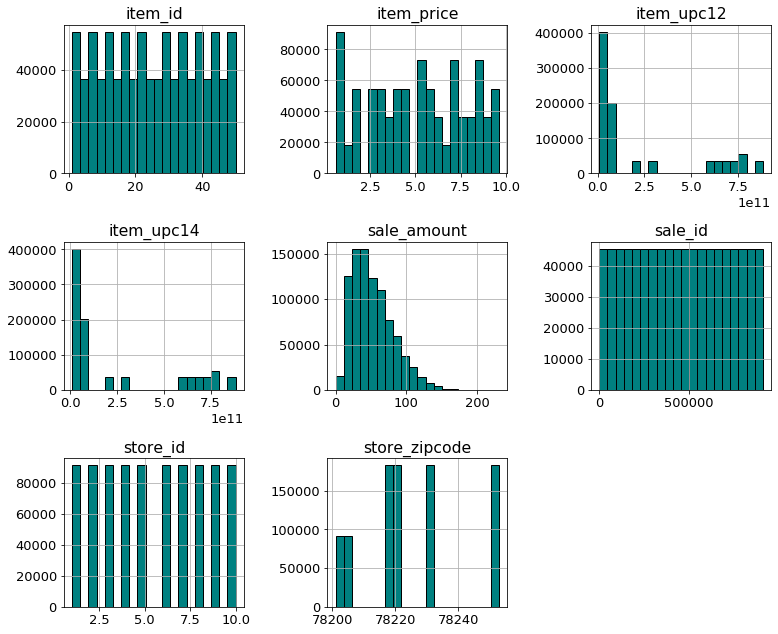

In [15]:
numeric_hists(df)

# What is an observation?
- a sale, i.e. the combination of store, item, and date

What should an observation be?

- one store: is the volume of items by store changing over time?
- one item: do some sell better than others?
- one date: Is there seasonality in our data?

If one observation is one date, how do we aggregate?

- sum of the sale amount -- total items sold across all stores
- avg of the sale amount -- average # of items sold
- item price -- multiply sale amount by item price to get total sales and then sum this to get daily revenue

sale amount == quantity sold

# 3. Set the index to be the datetime variable.

In [ ]:
# Sort rows by the date and then set the index as that date
df = df.set_index("sale_date").sort_index()

In [ ]:
df.head()

# 4. Add a 'month' and 'day of week' column to your dataframe.

In [ ]:
df['month'] = df.index.month
df.month.value_counts()

In [ ]:
df['day_of_the_week'] = df.index.day_name()
df.day_of_the_week.value_counts()

In [ ]:
df = df.rename(columns = {'sale_amount': 'quantity'})

In [ ]:
df.head()

# 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [ ]:
df['quantity'] = df.quantity * df.item_price
df.head()

# 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def prep_store_data(df):
    '''This function takes in a df, converts sales date to date time, creates a column for
    month and weekday, and calculates sales total and sales differential. Changes data
    types to objects. Plots histograms of numeric data and Returns a df
    '''

    df = get_store_data()
    
    # Converting sale_date to datetime
    df['sale_date'] = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y %H:%M:%S %Z')
    df = df.set_index('sale_date').sort_index()
    
    # Creating month and day_of_week column 
    df['month'] = df.index.month
    df['day_of_week'] = df.index.day_name()
    
    # Creating calculated columns
    df = df.assign(sales_total = df.sale_amount * df.item_price)
    df = df.assign(sales_diff = df.sales_total.diff(periods=1))
    
    # Change dtypes of numeric columns to object and category
    df = (df.astype({'sale_id': object, 'store_id': object,
                    'store_zipcode': object, 'item_id': object, 
                    'item_upc12': object, 'item_upc14': object, 
                    'month': 'category', 'day_of_week': 'category'}))
    
    # Creating histograms of numeric data
    numeric_hists(df)
                
    return df

In [ ]:
prep_store_data(df)

# Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [ ]:
energy = opsd_germany_daily()

In [ ]:
energy.head()

In [ ]:
energy.shape

In [ ]:
# Have some null values
energy.info()

# 1. Convert date column to datetime format.

In [ ]:
energy.Date = pd.to_datetime(energy.Date, format = '%Y-%m-%d')

In [ ]:
#Confirmed with .info that Date is datetime now
energy.info()

# 2. Plot the distribution of each of your variables.

In [ ]:
numeric_hists(energy)

# 3. Set the index to be the datetime variable.

In [ ]:
energy = energy.set_index("Date").sort_index()

In [ ]:
energy.head()

# 4.Add a month and a year column to your dataframe.

In [ ]:
energy.columns = [column.lower() for column in energy]

In [ ]:
energy = energy.rename(columns = {'wind+solar':'wind_and_solar'})

In [ ]:
energy.head()

In [ ]:
energy['month'] = energy.index.month
energy['year'] = energy.index.year

In [ ]:
energy.head()

# 5. Fill any missing values.

In [ ]:
energy = energy.fillna(0)

In [ ]:
energy.head()

# 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def prep_german_data(df):
    ''' This function acquires german data, converts the date into datetime format, creates numeric histograms,
    sets the index to the datetime variable, adds a month and year column and fills
    nulls with 0s
    '''
    # Acquires german data
    df = opsd_germany_daily()
    
    #converting date to datetime format
    df.Date = pd.to_datetime(energy.Date, format = '%Y-%m-%d')
    
    # Creating histograms of numeric data
    numeric_hists(df)
    
    # Setting index to the datetime variable
    df = df.set_index("Date").sort_index()
    
    # Adding month and year 
    df['month'] = df.index.month
    df['year'] = df.index.year
    
    # Filling nulls 
    df = df.fillna(0)
    
    return df

In [2]:
df = opsd_germany_daily()
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


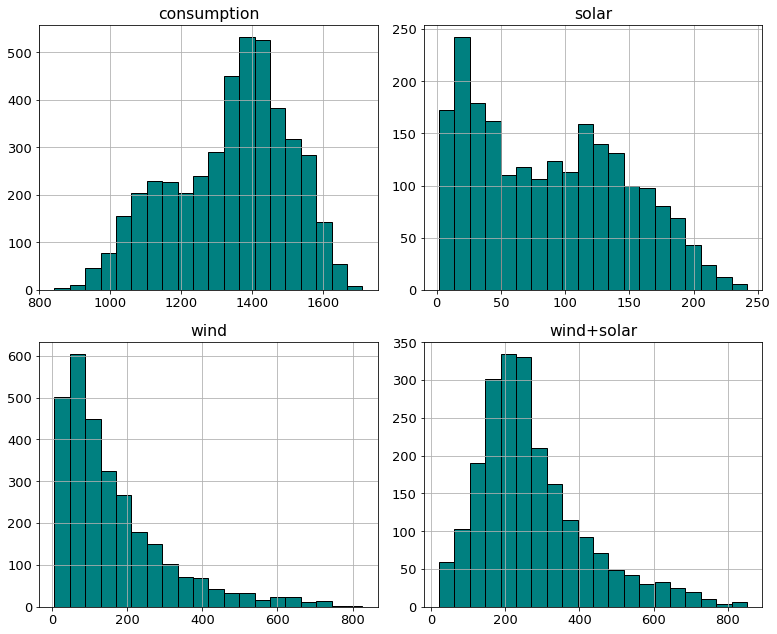

In [3]:
df = prep_german_data(df)

In [4]:
df.head()

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006
